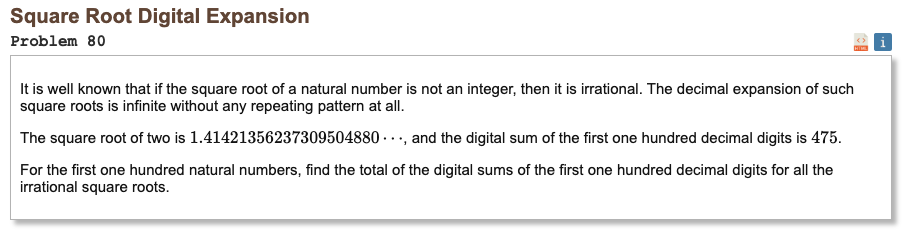

## Initial approach

* Lets understand the problem

In [1]:
print("Square root of 2 is: ", 2**0.5)
print("Lenght of decimal digits is: ", len(str(2**0.5))-2)
print

Square root of 2 is:  1.4142135623730951
Lenght of decimal digits is:  16


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

* So there is a limitation here. Try math library.

In [2]:
import math
print("Length of decimal digits: ", len(str(math.pow(2,0.5)))-2)

Length of decimal digits:  16


* Try sqrt()

In [3]:
import math
print("Length of decimal digits: ", len(str(math.sqrt(2)))-2)

Length of decimal digits:  16


* Try decimal library

In [4]:
import decimal
??decimal.Decimal

Init signature: decimal.Decimal(value='0', context=None)
Docstring:     
Construct a new Decimal object. 'value' can be an integer, string, tuple,
or another Decimal object. If no value is given, return Decimal('0'). The
context does not affect the conversion and is only passed to determine if
the InvalidOperation trap is active.
File:           /opt/anaconda3/envs/jarvis/lib/python3.12/decimal.py
Type:           type
Subclasses:     

In [5]:
decimal.getcontext().prec = 110
print(decimal.Decimal(2).sqrt())
print("Length of decimal digits: ", len(str(decimal.Decimal(2).sqrt())))

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727350138462
Length of decimal digits:  111


* Great! Now iterate this through all first 100 natural numbers.

In [6]:
# total = 0
# for i in range(1,100):
#     sqrt_of_num = str(decimal.Decimal(i).sqrt())
#     for k in range(0,98):
#         total += int(sqrt_of_num[2+k])

### IndexError: string index out of range

* sometimes string is not long enough and it throws IndexError.
* we use this:
```python
sqrt_str = str(Decimal(i).sqrt()).replace('.', '')[:100]
````
   
* it removes the dot, takes the first 100 digits including digit before the dot.

In [7]:
# fixed

total = 0
for i in range(1, 100):
    if int(i ** 0.5) ** 2 == i:
        continue
    sqrt_str = str(decimal.Decimal(i).sqrt()).replace('.', '')[:100]
    total += sum(int(digit) for digit in sqrt_str)

print("Result:", total)

Result: 40886
